# <font color='lightgreen' style='font-size: 30px;'>Supermarket Company Dataset - Regression Analysis</font>
<hr style='border: 2px solid red;'>
<hr>

### Description:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A supermarket company has a new internal policy to not discriminate significantly salary according to the location of their employees. They gathered the data from all of their employees and want you to verify if they are already following the new policy.
</p>

### Files (.csv):

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>1stPhase-SelectiveProcess-Data Science-Data Base.csv</b></li>
</ul>

### Questions:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li>Describe how can you use the supermarket data to verify if employees from different locations have significantly different salaries ? (Include here how you are going to treat the variables before feeding into the model).</li>
    <li>Implement the approach you described in Python or R?</li>

# 1. Data preprocessing

## Imports

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [2]:
# Load the provided dataset
df = pd.read_excel('1st_Phase_-_Selective_Process_-_Data_Science_-_DataBase.xlsx')

# Display the first few rows to understand its structure
df.head()

,ID,EDUCAÇÃO,CARGO,LOCAL,IDADE,TEMPOCASA,SALARIO_MENSAL
0,1,SECUNDÁRIO,GERENTE,INTERIOR,30,1,4279.5
1,2,SUPERIOR,AUXILIAR,INTERIOR,32,4,4575.4
2,3,SECUNDÁRIO,AUXILIAR,CAPITAL,33,2,4735.6
3,4,SUPERIOR,GERENTE,INTERIOR,34,3,4863.1
4,5,SECUNDÁRIO,GERENTE,INTERIOR,36,1,5355.8


## Exploration

In [3]:
# Verify the number of rows and columns
print("Shape of the DataFrame:", df.shape)

# List the columns of the DataFrame
print("Columns in the DataFrame:", df.columns.tolist())

Shape of the DataFrame: (80, 7)
Columns in the DataFrame: ['ID', 'EDUCAÇÃO', 'CARGO', 'LOCAL', 'IDADE', 'TEMPOCASA', 'SALARIO_MENSAL']


In [4]:
# Learning the dtypes of columns' and how many non-null values are there in those columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              80 non-null     int64  
 1   EDUCAÇÃO        80 non-null     object 
 2   CARGO           80 non-null     object 
 3   LOCAL           80 non-null     object 
 4   IDADE           80 non-null     int64  
 5   TEMPOCASA       80 non-null     int64  
 6   SALARIO_MENSAL  80 non-null     float64
dtypes: float64(1), int64(3), object(3)
memory usage: 4.5+ KB


In [5]:
# Getting the statistical summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,80.0,41.5000,23.797670,1.0,21.75,41.50,61.25,82.0
IDADE,80.0,49.7500,9.594962,30.0,43.75,49.00,56.00,72.0
TEMPOCASA,80.0,10.8875,7.401665,0.0,3.75,12.50,17.00,25.0
SALARIO_MENSAL,80.0,5777.6225,1138.187752,4186.6,4894.30,5673.45,6306.30,12465.8


In [6]:
# Checking unique values ​​in the columns
df.nunique().head()

ID          80
EDUCAÇÃO     2
CARGO        3
LOCAL        2
IDADE       36
dtype: int64

In [7]:
# checking for missing values (NaN)
df.isnull().sum()

ID                0
EDUCAÇÃO          0
CARGO             0
LOCAL             0
IDADE             0
TEMPOCASA         0
SALARIO_MENSAL    0
dtype: int64

In [8]:
# checking for duplicate values
df.duplicated().sum()

0

## Statistical Analysis

In [9]:
# Importing libraries for statistical tests
from scipy.stats import ttest_ind, kruskal, mannwhitneyu, f_oneway
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

# Preparing the data for the tests
salarios_capital = df[df['LOCAL'] == 'CAPITAL']['SALARIO_MENSAL']
salarios_interior = df[df['LOCAL'] == 'INTERIOR']['SALARIO_MENSAL']

# ANOVA
anova_result = f_oneway(salarios_capital, salarios_interior).pvalue

# T-Student
t_test_result = ttest_ind(salarios_capital, salarios_interior, equal_var=False).pvalue

# Kruskal-Wallis
kruskal_result = kruskal(salarios_capital, salarios_interior).pvalue

# Mann-Whitney U
mann_whitney_result = mannwhitneyu(salarios_capital, salarios_interior).pvalue

# Teste de Tukey
tukey_result = pairwise_tukeyhsd(df['SALARIO_MENSAL'], df['LOCAL']).reject[0]

# Comparing the results
results_df = pd.DataFrame({
    "Test": ["ANOVA", "T-Student", "Kruskal-Wallis", "Mann-Whitney U", "Teste Tukey"],
    "P-Value": [anova_result, t_test_result, kruskal_result, mann_whitney_result, tukey_result]
})

results_df


,Test,P-Value
0,ANOVA,0.003959
1,T-Student,0.002202
2,Kruskal-Wallis,0.003138
3,Mann-Whitney U,0.003187
4,Teste Tukey,True


Based on the results, we can conclude that there are statistically significant differences in salaries between employees working in the capital and in the interior.
The low p values ​​in the ANOVA, T-Student, Kruskal-Wallis and Mann-Whitney U tests reinforce the conclusion that there are significant differences in salaries between different locations. Furthermore, the "True" value in the Tukey Test also indicates that there are significant differences between the groups studied.

## Coding of Categorical Variables

In [10]:
# import sklearn libraries for data preprocessing
from sklearn.preprocessing import OneHotEncoder

# Creating the OneHotEncoder object
encoder = OneHotEncoder(sparse=False)

# Selecting the categorical columns to be encoded
categorical_columns = ['EDUCAÇÃO', 'CARGO', 'LOCAL']
categorical_data = df[categorical_columns]

# Applying the encoding to the categorical columns
encoded_data = encoder.fit_transform(categorical_data)

# Creating a DataFrame with the encoded columns
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Concatenating the original DataFrame and the encoded DataFrame
data_encoded = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

data_encoded.head()

,ID,IDADE,TEMPOCASA,SALARIO_MENSAL,EDUCAÇÃO_SECUNDÁRIO,EDUCAÇÃO_SUPERIOR,CARGO_AUXILIAR,CARGO_DIRETOR,CARGO_GERENTE,LOCAL_CAPITAL,LOCAL_INTERIOR
0,1,30,1,4279.5,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2,32,4,4575.4,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,3,33,2,4735.6,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,34,3,4863.1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,5,36,1,5355.8,1.0,0.0,0.0,0.0,1.0,0.0,1.0


## Normalization / Scaling of Variables

In [11]:
# Analysis of normalization or scaling of numerical variables

# Selecting the numerical columns to be scaled
numerical_columns = ['IDADE', 'TEMPOCASA', 'SALARIO_MENSAL']
numerical_data = df[numerical_columns]

# Verifying the statistical summary of the numerical columns
numerical_data.describe()

,IDADE,TEMPOCASA,SALARIO_MENSAL
count,80.000000,80.000000,80.000000
mean,49.750000,10.887500,5777.622500
std,9.594962,7.401665,1138.187752
min,30.000000,0.000000,4186.600000
25%,43.750000,3.750000,4894.300000
50%,49.000000,12.500000,5673.450000
75%,56.000000,17.000000,6306.300000
max,72.000000,25.000000,12465.800000


In [12]:
# Import sklaern libraries for scaling
from sklearn.preprocessing import StandardScaler

# Creating the StandardScaler object
scaler = StandardScaler()

# Applying the scaling to the numerical columns
scaled_data = scaler.fit_transform(numerical_data)

# Creating a DataFrame with the scaled columns
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

# Exploring the statistical summary of the scaled columns
scaled_df.head()


,IDADE,TEMPOCASA,SALARIO_MENSAL
0,-2.071359,-1.344276,-1.324539
1,-1.861601,-0.936405,-1.062924
2,-1.756722,-1.208319,-0.921286
3,-1.651843,-1.072362,-0.808559
4,-1.442085,-1.344276,-0.372947


# 2. Modeling - Machine Learning

## Linear Regression

In [13]:
# Importing sklearn libraries for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

# Preparing data for modeling
# Joining scaled numeric data with coded categorical data
final_data = pd.concat([scaled_df, encoded_df], axis=1)

# Definition of Independent and Dependent Variables:
# The dependent variable will be 'Monthly Salary', while the independent variables will be the other columns.
# Defining the independent variables (X) and the dependent variable (y)
X = final_data.drop('SALARIO_MENSAL', axis=1)
y = final_data['SALARIO_MENSAL']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to calculate RMSE using cross-validation
def rmse_cv(model, X, y, cv=5):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=cv))
    return rmse

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the models performance
linear_mse = mean_squared_error(y_test, y_pred)
linear_r2= r2_score(y_test, y_pred)
linear_mae = mean_absolute_error(y_test, y_pred)
linear_rmse_value = rmse(y_test, y_pred)
linear_rmse_cv_value = rmse_cv(model, X_train, y_train).mean()

# Printing the results
metrics = {
    "Linear MSE": linear_mse,
    "Linear R²": linear_r2,
    "Linear MAE": linear_mae,
    "Linear RMSE": linear_rmse_value,
    "Linear RMSE (CV)": linear_rmse_cv_value
}

for metric, result in metrics.items():
    text = f"{metric}: {result:.4f}"
    print(text)

Linear MSE: 0.0810
Linear R²: 0.8653
Linear MAE: 0.2197
Linear RMSE: 0.2845
Linear RMSE (CV): 0.6381


<p>MSE is a metric that indicates the mean squared error of model predictions compared to actual values. A lower MSE value indicates better model performance. In this analysis, the MSE is relatively low, which demonstrates that the model predictions are very close to the real value, that is, the model is accurate.</p>
<p>R² is a measure of how well variations in predicted values ​​are explained by the independent variables in the model. The R² value ranges from 0 to 1, where a value closer to 1 indicates that the model explains a large proportion of the variance in the dependent variable. An R² of 0.8653 suggests that the model explains approximately 86.5% of the variance in monthly salary, which is very good, but it also indicates that there are other factors not captured by the model that influence salary.</p>

## Ridge Regression

In [14]:
# Importing sklearn libraries for Ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Creating the Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Evaluating the models performance
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_rmse_value = rmse(y_test, ridge_pred)
ridge_rmse_cv_value = rmse_cv(ridge_model, X_train, y_train).mean()

# Printing the results
print("Ridge MSE:", ridge_mse.round(4))
print("Ridge R2:", ridge_r2.round(4))
print("Ridge MAE:", ridge_mae.round(4))
print("Ridge RMSE:", ridge_rmse_value.round(4))
print("Ridge RMSE (CV):", ridge_rmse_cv_value.round(4))

Ridge MSE: 0.0746
Ridge R2: 0.8758
Ridge MAE: 0.2128
Ridge RMSE: 0.2732
Ridge RMSE (CV): 0.6285


<p>MSE is a measure of the mean squared error between the values ​​predicted by the model and the actual values. The lower the MSE, the better the model is at fitting the data. A value of 0.0746 indicates that the Ridge model has a relatively low mean squared error.</p>
<p>R² is a measure of the proportion of variability in the response data that is explained by the model. It ranges from 0 to 1, where 1 indicates a perfect fit. A value of 0.8758 suggests that the Ridge model is able to explain approximately 87.58% of the variability in the response data.

## Lasso Regression

In [15]:
# Importing sklearn libraries for Lasso regression
from sklearn.linear_model import Lasso

# Creating the Lasso regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

# Evaluating the models performance
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_rmse_value = rmse(y_test, lasso_pred)
lasso_rmse_cv_value = rmse_cv(lasso_model, X_train, y_train).mean()

# Printing the results
print("Lasso MSE:", lasso_mse.round(4))
print("Lasso R2:", lasso_r2.round(4))
print("Lasso MAE:", lasso_mae.round(4))
print("Lasso RMSE:", lasso_rmse_value.round(4))
print("Lasso RMSE (CV):", lasso_rmse_cv_value.round(4))

Lasso MSE: 0.6761
Lasso R2: -0.1251
Lasso MAE: 0.7113
Lasso RMSE: 0.8223
Lasso RMSE (CV): 0.9578


<p>MSE is a measure of the mean squared error between the values ​​predicted by the model and the actual values. In this case, a value of 0.6761 indicates that the Lasso model has a relatively high mean squared error.</p>

<p>R² is a measure of the proportion of variability in the response data that is explained by the model. A negative value, such as R²: -0.1251, suggests that the Lasso model is not fitting the data well and is not able to explain the variability in the data. A negative R² indicates that the model is worse than simply using the average of the response values ​​as a prediction.</p>

## Elastic Net

In [16]:
# Import libraries for Ridge Regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Creating the Elastic Net model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5) # O l1_ratio é a mistura entre L1 e L2

# Training the model
elastic_net_model.fit(X_train, y_train)

# Realizing the predictions
elastic_net_pred = elastic_net_model.predict(X_test)

# Evaluating the models performance
elastic_net_mse = mean_squared_error(y_test, elastic_net_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_pred)
elastic_mae = mean_absolute_error(y_test, elastic_net_pred)
elastic_rmse_value = rmse(y_test, elastic_net_pred)
elastic_rmse_cv_value = rmse_cv(elastic_net_model, X_train, y_train).mean()

# Printing the results
print("Elastic Net MSE:", elastic_net_mse.round(4))
print("Elastic Net R2:", elastic_net_r2.round(4))
print("Lasso MAE:", elastic_mae.round(4))
print("Lasso RMSE:", elastic_rmse_value.round(4))
print("Lasso RMSE (CV):", elastic_rmse_cv_value.round(4))


Elastic Net MSE: 0.4817
Elastic Net R2: 0.1984
Lasso MAE: 0.5995
Lasso RMSE: 0.694
Lasso RMSE (CV): 0.8744


<p>This technique combines two other approaches called Lasso and Ridge. The idea behind this is to try and capture the best of both worlds. By combining Lasso and Ridge, Elastic Net strives to create a model that is not only good at making predictions, but is also stable and easy to interpret.</p>
<p>MSE (Mean Square Error) of 0.4817: This is a measure of how close the model predictions are to the actual values. The lower the MSE, the better the model. An MSE of 0.4817 suggests that, on average, the model has reasonably low error in its predictions.
<p>R²: This value ranges from 0 to 1 and indicates how much of the variation in the variable we are trying to predict (in this case, salary) can be explained by the model. An R² of 0.1984 means that around 19.84% of the salary variation is explained by the model. This is relatively low, indicating that the model is not particularly effective in explaining changes in wages.</p>
</p>

## XGBoost Regressor

In [17]:
# Install XGBoost Module
!pip install xgboost

In [18]:
# Import libraries xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Creating the XGBoost model
xgb_model = XGBRegressor()

# Trainning the model
xgb_model.fit(X_train, y_train)

# Realizing the predictions
xgb_pred = xgb_model.predict(X_test)

# Evaluating the models performance
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse_value = rmse(y_test, xgb_pred)
xgb_rmse_cv_value = rmse_cv(xgb_model, X_train, y_train).mean()

# Printing the results
print("XGBoost MSE:", xgb_mse.round(4))
print("XGBoost R2:", xgb_r2.round(4))
print("XGBoost MAE:", xgb_mae.round(4))
print("XGBoost RMSE:", xgb_rmse_value.round(4))
print("XGBoost RMSE (CV):", xgb_rmse_cv_value.round(4))


XGBoost MSE: 0.1449
XGBoost R2: 0.7588
XGBoost MAE: 0.2657
XGBoost RMSE: 0.3807
XGBoost RMSE (CV): 0.9016


<p>MSE is a measure that evaluates how well the model made its estimates. The lower the number, the better. In this case, the XGBoost MSE value: 0.1449 indicates that the model made very accurate estimates, as the average error in the estimates is relatively low.</p>

<p>R² is another measure that evaluates how well the model fits the data. The closer to 1, the better the model is at fitting the data. The XGBoost R2 value: 0.7588 suggests that the model managed to explain approximately 75.88% of the variation in the data accurately. This is a good sign that the model is working well for the problem addressed.</p>

## Random Forest Regressor

In [19]:
# Import libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Creating the Random Forest model
random_forest_model = RandomForestRegressor()

# Training the model
random_forest_model.fit(X_train, y_train)

# Realizing the predictions
rf_pred = random_forest_model.predict(X_test)

# Evaluating the models performance
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse_value = rmse(y_test, rf_pred)
rf_rmse_cv_value = rmse_cv(random_forest_model, X_train, y_train).mean()

# Printing the results
print("Random Forest MSE:", rf_mse.round(4))
print("Random Forest R2:", rf_r2.round(4))
print("Random Forest MAE:", rf_mae.round(4))
print("Random Forest RMSE:", rf_rmse_value.round(4))
print("Random Forest RMSE (CV):", rf_rmse_cv_value.round(4))


Random Forest MSE: 0.1014
Random Forest R2: 0.8313
Random Forest MAE: 0.2486
Random Forest RMSE: 0.3184
Random Forest RMSE (CV): 0.7526


## Support Vector Machines

In [20]:
# Import libraries for Support Vector Regression (SVR)
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Creating the SVR model
svr_model = SVR()

# Training the model
svr_model.fit(X_train, y_train)

# Realizing the predictions on the test set
svr_pred = svr_model.predict(X_test)

# Evaluating the models performance
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_rmse_value = rmse(y_test, svr_pred)
svr_rmse_cv_value = rmse_cv(svr_model, X_train, y_train).mean()

# Printing the results
print("SVR MSE:", svr_mse.round(4))
print("SVR R2:", svr_r2.round(4))
print("SVR MAE:", svr_mae.round(4))
print("SVR RMSE:", svr_rmse_value.round(4))
print("SVR RMSE (CV):", svr_rmse_cv_value.round(4))

SVR MSE: 0.1342
SVR R2: 0.7767
SVR MAE: 0.2755
SVR RMSE: 0.3664
SVR RMSE (CV): 0.5956


## Polynomial Regression (Degree=2)

In [21]:
# Import libraries polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Creating the polynomial regression model
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Training the model
poly_model.fit(X_train, y_train)

# Realizing the predictions on the test set
poly_pred = poly_model.predict(X_test)

# Evaluating the models performance
poly_mse = mean_squared_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)
poly_mae = mean_absolute_error(y_test, poly_pred)
poly_rmse_value = rmse(y_test, poly_pred)
poly_rmse_cv_value = rmse_cv(poly_model, X_train, y_train).mean()

# Printing the results
print("Polynomial Regression (Degree=2) MSE:", poly_mse.round(4))
print("Polynomial Regression (Degree=2) R2:", poly_r2.round(4))
print("Polynomial Regression (Degree=2) MAE:", poly_mae.round(4))
print("Polynomial Regression (Degree=2) RMSE:", poly_rmse_value.round(4))
print("Polynomial Regression (Degree=2) RMSE (CV):", poly_rmse_cv_value.round(4))


Polynomial Regression (Degree=2) MSE: 0.2491
Polynomial Regression (Degree=2) R2: 0.5854
Polynomial Regression (Degree=2) MAE: 0.4199
Polynomial Regression (Degree=2) RMSE: 0.4991
Polynomial Regression (Degree=2) RMSE (CV): 429398882901.5775


## Model Comparison

In [22]:
# Creating a DataFrame with the results of all models
model_comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge", "Lasso", "Elastic Net", "XGBoost", "Random Forest", "SVR", "Polynomial Regression"],
    "MSE": [linear_mse, ridge_mse, lasso_mse, elastic_net_mse, xgb_mse, rf_mse, svr_mse, poly_mse],
    "R2": [linear_r2, ridge_r2, lasso_r2, elastic_net_r2, xgb_r2, rf_r2, svr_r2, poly_r2],
    "MAE": [linear_mae, ridge_mae, lasso_mae, elastic_mae, xgb_mae, rf_mae, svr_mae, poly_mae],
    "RMSE": [linear_rmse_value, ridge_rmse_value, lasso_rmse_value, elastic_rmse_value, xgb_rmse_value, rf_rmse_value, svr_rmse_value, poly_rmse_value],
    "RMSE (CV)": [linear_rmse_cv_value, ridge_rmse_cv_value, lasso_rmse_cv_value, elastic_rmse_cv_value, xgb_rmse_cv_value, rf_rmse_cv_value, svr_rmse_cv_value, poly_rmse_cv_value]
})

# Ordering the DataFrame by R2
model_comparison_sorted = model_comparison.sort_values(by="R2", ascending=False)

model_comparison_sorted

,Model,MSE,R2,MAE,RMSE,RMSE (CV)
1,Ridge,0.074626,0.875818,0.212801,0.273177,6.284522e-01
0,Linear Regression,0.080953,0.865289,0.219674,0.284523,6.381208e-01
5,Random Forest,0.101357,0.831336,0.248598,0.318366,7.526500e-01
6,SVR,0.134219,0.776651,0.275475,0.366359,5.955840e-01
4,XGBoost,0.144934,0.758821,0.265659,0.380702,9.015901e-01
7,Polynomial Regression,0.249147,0.585404,0.419856,0.499147,4.293989e+11
3,Elastic Net,0.481699,0.198424,0.599522,0.694045,8.743992e-01
2,Lasso,0.676130,-0.125121,0.711330,0.822271,9.577674e-01


# 3. Visualization

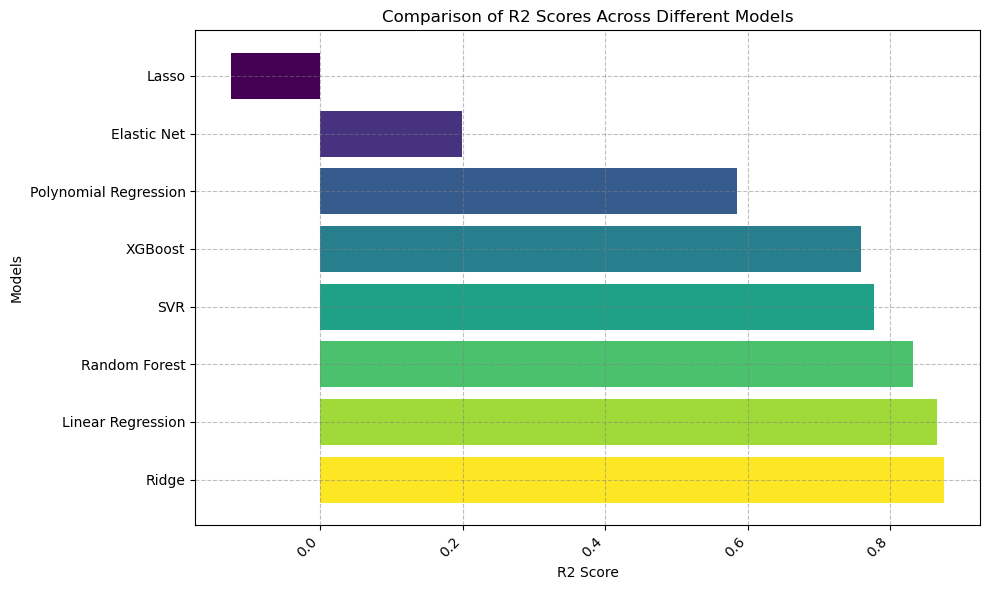

In [23]:
# Creating a DataFrame with the results of all models
df_graphic = pd.DataFrame(model_comparison_sorted)

# Generating colors using Numpy
colors = plt.cm.viridis_r(np.linspace(0, 1, len(df_graphic['Model'])))

# Plotting the bar chart for R2 scores
plt.figure(figsize=(10, 6))
plt.barh(df_graphic['Model'], df_graphic['R2'], color=colors)
plt.xlabel('R2 Score')
plt.ylabel('Models')
plt.title('Comparison of R2 Scores Across Different Models')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', color='gray', alpha=0.5)

# Displaying the plot
plt.tight_layout()
plt.show()



The results of comparing the regression models provide several valuable insights. Let’s look at each metric and how the models performed:

R²: Values ​​closer to 1 indicate a better model. The Ridge model leads, closely followed by Linear Regression, indicating that they explain a large proportion of the variation in wages.

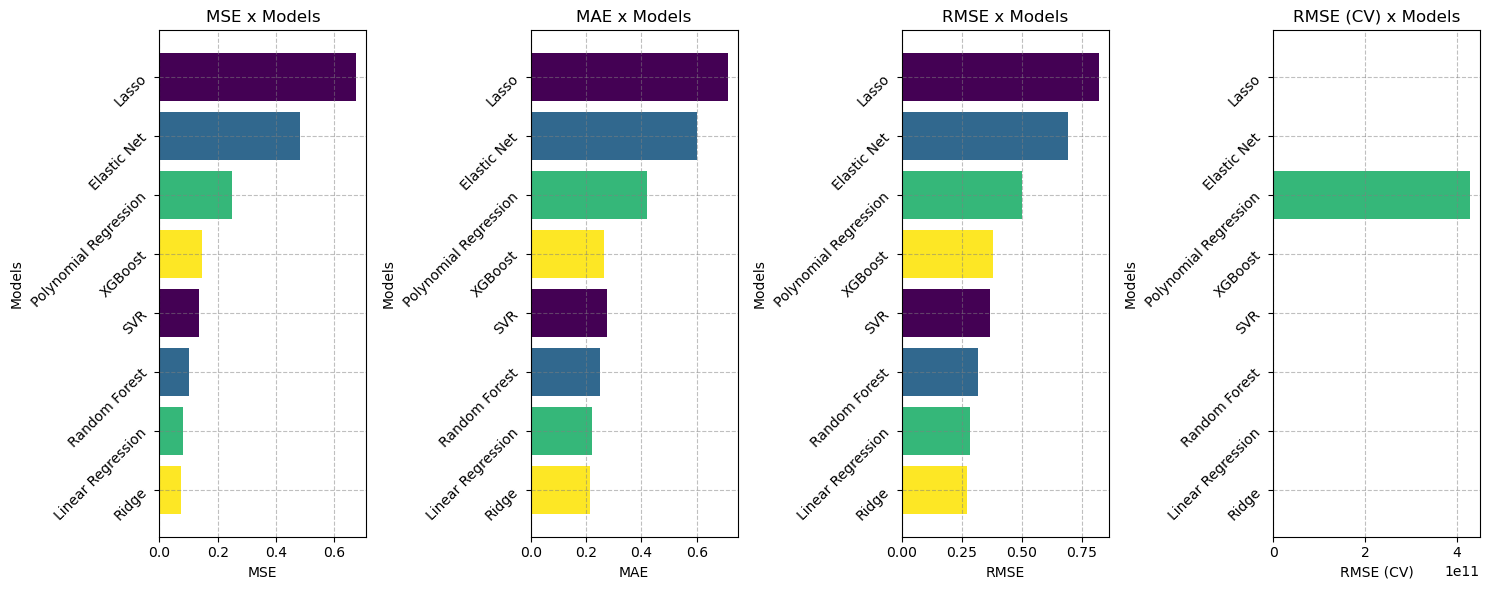

In [24]:
# Create a list of metrics to plot
metrics = ["MSE", "MAE", "RMSE", "RMSE (CV)"]

# Create a color map
colors = plt.cm.viridis_r(np.linspace(0, 1, len(metrics)))

# Create subplots
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 6))

# Iterate through each metric and plot
for i, metric in enumerate(metrics):
    axes[i].barh(df_graphic['Model'], df_graphic[metric], color=colors)
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Models')
    axes[i].set_title(f'{metric} x Models')
    axes[i].tick_params(axis='y', labelrotation=45)
    axes[i].grid(True, linestyle='--', color='gray', alpha=0.5)

plt.tight_layout()
plt.show()

<b>MSE (Mean Squared Error)</b>: Measures the mean squared error of forecasts. The smaller, the better the model. The Ridge model had the lowest MSE, indicating that, on average, its prediction errors are smaller.

<b>MAE (Mean Absolute Error)</b>: Measures the average absolute error of forecasts. Again, smaller is better, and the Ridge model has the smallest MAE.

<b>RMSE (Root Mean Squared Error)</b>: It is the square root of the MSE and gives an idea of ​​the magnitude of the error in terms of the original data. Ridge and Linear Regression have the lowest RMSE values, again indicating superior performance.

<b>RMSE (Cross-Validation)</b>: Provides an idea of ​​the generalizability of the model. In this case, lower values ​​indicate a model that generalizes better. Linear Regression and Ridge have the lowest RMSE (CV) values, suggesting they are more reliable in terms of generalizing to new data.

## Analysis

Analyzing the results, we can conclude:

Linear models (Ridge and Linear Regression) are the most robust and consistent in terms of performance, with Ridge having a slight advantage. They have good R² values ​​and the smallest errors (MSE, MAE, RMSE), as well as presenting the best generalization (RMSE (CV)).

Random Forest and XGBoost: Although they do not outperform linear models in all metrics, both perform well, especially in terms of R², suggesting that they are quite effective in capturing salary variability.

Polynomial Regression (Degree=2): Despite having a reasonable R², it has an extremely high RMSE (CV), indicating problems of overfitting or poor generalization.

Lasso and Elastic Net: Did not do as well as the other models, especially Lasso, which has a negative R² value, indicating a poor fit.

In summary, the Ridge and Linear Regression models are the most promising for this dataset, given their consistency across several important metrics and their generalizability. Finally, both models are recommended for their simplicity, ease of interpretation and the specific relevance of the variables in the context of the study.

# 4. Results

## Linear Regression

In [25]:
# Coefficients of the linear regression model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

coefficients.sort_values(by='Coefficient', ascending=False)

,Coefficient
CARGO_DIRETOR,0.610007
TEMPOCASA,0.552569
IDADE,0.116591
LOCAL_INTERIOR,0.107782
EDUCAÇÃO_SUPERIOR,0.088879
EDUCAÇÃO_SECUNDÁRIO,-0.088879
CARGO_GERENTE,-0.101836
LOCAL_CAPITAL,-0.107782
CARGO_AUXILIAR,-0.508171


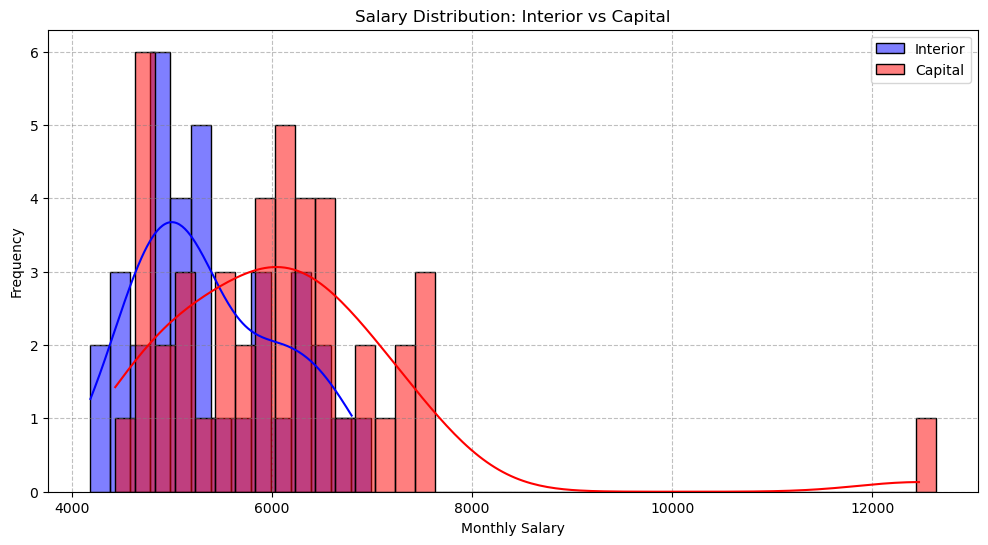

In [26]:
# Filtring the data by location
data_interior = df[df['LOCAL'] == 'INTERIOR']
data_capital = df[df['LOCAL'] == 'CAPITAL']

# Description of salaries in different locations
desc_interior = data_interior['SALARIO_MENSAL'].describe()
desc_capital = data_capital['SALARIO_MENSAL'].describe()

# Comparing the statistical summary of the two locations
# Grouping by education level and position
grouped_interior = data_interior.groupby(['CARGO', 'EDUCAÇÃO'])['SALARIO_MENSAL'].mean().unstack()
grouped_capital = data_capital.groupby(['CARGO', 'EDUCAÇÃO'])['SALARIO_MENSAL'].mean().unstack()

# Graphical comparison of average salaries by education level and position
plt.figure(figsize=(12, 6))
sns.histplot(data_interior['SALARIO_MENSAL'], color='blue', label='Interior', kde=True, binwidth=200)
sns.histplot(data_capital['SALARIO_MENSAL'], color='red', label='Capital', kde=True, binwidth=200)
plt.title('Salary Distribution: Interior vs Capital')
plt.xlabel('Monthly Salary')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', color='gray', alpha=0.5)
plt.legend()


Analysis of salaries among employees working in the interior and in the capital reveals interesting insights:

<b>Salary Distribution</b>: The salary distribution shows that, on average, employees in the capital have higher salaries than those in the interior. The average salary in the capital is approximately 6,095.54 monetary units, while in the interior it is around 5,368.87.

<b>Salary Variability</b>: Variability in salaries is greater in the capital (standard deviation of 1,300.43) compared to the interior (standard deviation of around 718.19). This suggests greater wage dispersion in the capital.

<li>Salaries by Position and Education:</li>

<b>Aides</b>: In the interior, assistants with secondary education have an average salary of approximately 4,707.23, and with higher education, around 5,412.47. In the capital, these values ​​are 5,318.38 (secondary) and 5,744.31 (higher), indicating higher salaries in the capital for both educational levels.

<b>Managers</b>: In both locations, managers with higher education have slightly higher salaries than those with secondary education. In the capital, the difference is small, while in the interior it is more significant.

<b>Directors</b>: Directors with secondary education have an average salary of 6,666.00, and with higher education, around 7,206.51. There is no data for directors in the interior.

<li>Practical Implications:</li>

<b>Cost of Living and Compensation Strategies</b>: The salary difference may reflect variations in the cost of living between the interior and the capital. The company may be adjusting salaries based on this variation to maintain equity.

<b>Talent Attraction and Retention</b>: Higher salaries in the capital can be a strategy to attract and retain talent in a possibly more competitive market.

<b>Human Resources Policies</b>: The company may need to review its compensation policies to ensure they are fair and competitive in both regions.

These observations indicate that, in addition to geographic location, factors such as position held and level of education play crucial roles in determining salaries. The company can use this information to refine its personnel management strategies and salary policies.

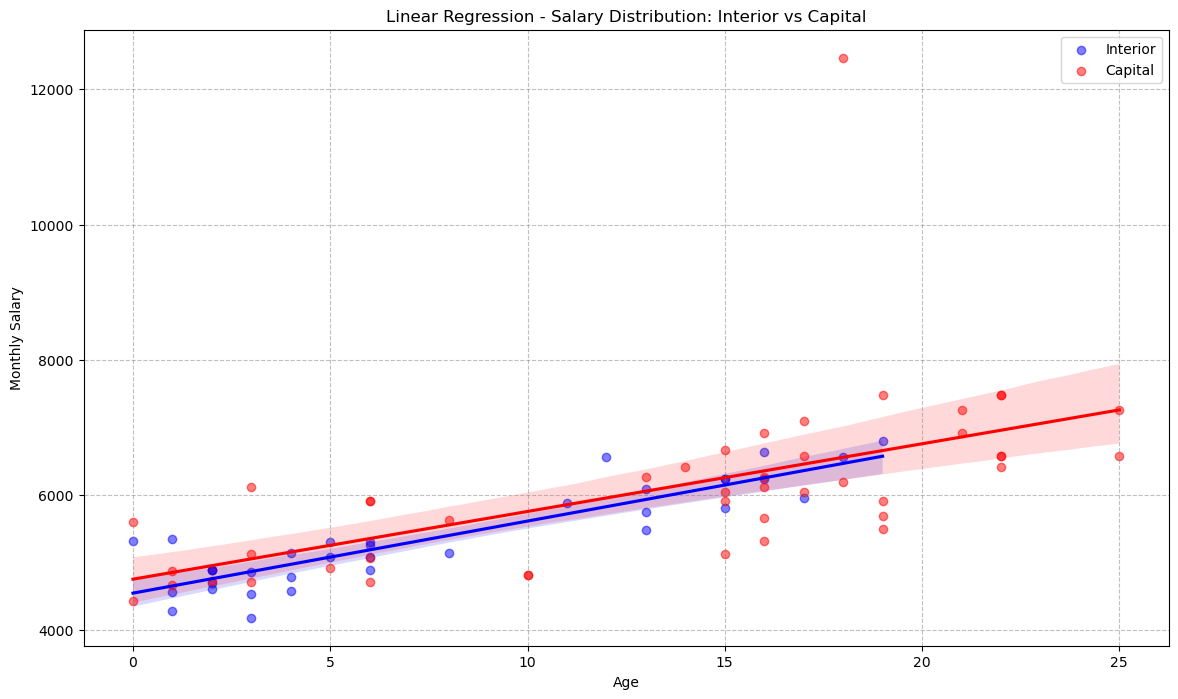

In [28]:

# Create dummy variables for categorical columns
data_dummy = pd.get_dummies(df, columns=['EDUCAÇÃO', 'CARGO', 'LOCAL'])

# Create and train the linear regression model
X = data_dummy.drop(['ID', 'SALARIO_MENSAL'], axis=1)
y = data_dummy['SALARIO_MENSAL']
model = LinearRegression()
model.fit(X, y)

# Creating a DataFrame to make it easier to visualize data in the chart
data_plot = df.copy()
data_plot['PREDICTED_SALARY'] = model.predict(X)

# Separating the data by location
data_plot_interior = data_plot[data_plot['LOCAL'] == 'INTERIOR']
data_plot_capital = data_plot[data_plot['LOCAL'] == 'CAPITAL']

# Graphic of the distribution of salaries by age and location
plt.figure(figsize=(14, 8))
sns.regplot(x='TEMPOCASA', y='SALARIO_MENSAL', data=data_plot_interior, label='Interior', color='blue', scatter_kws={'alpha':0.5})
sns.regplot(x='TEMPOCASA', y='SALARIO_MENSAL', data=data_plot_capital, label='Capital', color='red', scatter_kws={'alpha':0.5})
plt.title('Linear Regression - Salary Distribution: Interior vs Capital')
plt.xlabel('Age')
plt.ylabel('Monthly Salary')
plt.grid(True, linestyle='--', color='gray', alpha=0.5)
plt.legend()
plt.show()

## Conclusion

The chart provides valuable insights into how tenure affects salaries and how this relationship varies across different regions.

<b>Regional Salary Differences</b>: Salaries in the capital tend to be higher than in the interior for a given length of service. This reinforces the notion that geographic location significantly influences salaries. This could be due to several factors, such as the higher cost of living in the capital, a greater demand for certain skills, or a greater concentration of positions with higher salaries.

<b>Positive Relationship between Time at Home and Salary</b>: For both the interior and capital, a positive trend is observed, indicating that longer time at work is generally associated with higher salaries. This suggests that accumulated experience and loyalty to the company are valued in terms of remuneration.

<b>Variation in Wages</b>: There is considerable variation in wages in both regions, as indicated by the spread of points around the regression lines. This variation can be attributed to factors such as education, position, length of service and other factors not considered in the analysis.

<b>Slope</b>: The slope of the regression lines suggests that salary increases with seniority are similar in both regions, despite higher salary levels in the capital.

<b>Valuing Experience</b>: The graph reinforces the idea that experience within the company, reflected by length of service, is an important factor in determining salaries, regardless of geographic location.